In [1]:
!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import os
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping

### Import data BTC



In [13]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdullahdatascience/crypto-coins-dataset-2013-2025")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'crypto-coins-dataset-2013-2025' dataset.
Path to dataset files: /kaggle/input/crypto-coins-dataset-2013-2025


In [14]:
print(os.listdir(path))

['ETH_merged_2015_to_2025.csv', 'BNB_merged_2017_to_2025.csv', 'BTC_merged_2010_to_2025.csv']


In [15]:
df = pd.read_csv(f"{path}/BTC_merged_2010_to_2025.csv")

In [17]:
df.tail()

,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,timestamp
5469,2025-07-04T00:00:00.000Z,2025-07-04T23:59:59.999Z,2025-07-04T01:36:00.000Z,2025-07-04T19:32:00.000Z,2781,109635.655197,109751.987456,107296.380030,108034.339050,4.261644e+10,2.148181e+12,2025-07-04 23:59:59.999000+00:00
5470,2025-07-05T00:00:00.000Z,2025-07-05T23:59:59.999Z,2025-07-05T04:31:00.000Z,2025-07-05T02:34:00.000Z,2781,108015.839226,108381.340161,107842.275057,108231.181990,3.061554e+10,2.152515e+12,2025-07-05 23:59:59.999000+00:00
5471,2025-07-06T00:00:00.000Z,2025-07-06T23:59:59.999Z,2025-07-06T21:32:00.000Z,2025-07-06T10:03:00.000Z,2781,108231.183833,109731.625945,107847.017159,109232.069735,3.674602e+10,2.172541e+12,2025-07-06 23:59:59.999000+00:00
5472,2025-07-07T00:00:00.000Z,2025-07-07T23:59:59.999Z,2025-07-07T03:28:00.000Z,2025-07-07T18:34:00.000Z,2781,109235.327990,109710.249827,107527.057210,108299.851088,4.541570e+10,2.153955e+12,2025-07-07 23:59:59.999000+00:00
5473,2025-07-08T00:00:00.000Z,2025-07-08T23:59:59.999Z,2025-07-08T13:47:00.000Z,2025-07-08T02:19:00.000Z,2781,108298.228975,109198.971616,107499.556468,108950.275543,4.428220e+10,2.166970e+12,2025-07-08 23:59:59.999000+00:00


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5474 entries, 0 to 5473
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timeOpen   5474 non-null   object 
 1   timeClose  5474 non-null   object 
 2   timeHigh   5474 non-null   object 
 3   timeLow    5474 non-null   object 
 4   name       5474 non-null   int64  
 5   open       5474 non-null   float64
 6   high       5474 non-null   float64
 7   low        5474 non-null   float64
 8   close      5474 non-null   float64
 9   volume     5474 non-null   float64
 10  marketCap  5474 non-null   float64
 11  timestamp  5474 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 513.3+ KB


In [19]:
df.tail()

,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,timestamp
5469,2025-07-04T00:00:00.000Z,2025-07-04T23:59:59.999Z,2025-07-04T01:36:00.000Z,2025-07-04T19:32:00.000Z,2781,109635.655197,109751.987456,107296.380030,108034.339050,4.261644e+10,2.148181e+12,2025-07-04 23:59:59.999000+00:00
5470,2025-07-05T00:00:00.000Z,2025-07-05T23:59:59.999Z,2025-07-05T04:31:00.000Z,2025-07-05T02:34:00.000Z,2781,108015.839226,108381.340161,107842.275057,108231.181990,3.061554e+10,2.152515e+12,2025-07-05 23:59:59.999000+00:00
5471,2025-07-06T00:00:00.000Z,2025-07-06T23:59:59.999Z,2025-07-06T21:32:00.000Z,2025-07-06T10:03:00.000Z,2781,108231.183833,109731.625945,107847.017159,109232.069735,3.674602e+10,2.172541e+12,2025-07-06 23:59:59.999000+00:00
5472,2025-07-07T00:00:00.000Z,2025-07-07T23:59:59.999Z,2025-07-07T03:28:00.000Z,2025-07-07T18:34:00.000Z,2781,109235.327990,109710.249827,107527.057210,108299.851088,4.541570e+10,2.153955e+12,2025-07-07 23:59:59.999000+00:00
5473,2025-07-08T00:00:00.000Z,2025-07-08T23:59:59.999Z,2025-07-08T13:47:00.000Z,2025-07-08T02:19:00.000Z,2781,108298.228975,109198.971616,107499.556468,108950.275543,4.428220e+10,2.166970e+12,2025-07-08 23:59:59.999000+00:00


### Data Preprocessing

In [20]:
df.isnull().sum()

,0
timeOpen,0
timeClose,0
timeHigh,0
timeLow,0
name,0
open,0
high,0
low,0
close,0
volume,0


In [23]:
scaler = MinMaxScaler(feature_range=(0, 1))

scaled = scaler.fit_transform(df['close'].values.reshape(-1, 1))
scaled

array([[0.00000000e+00],
       [1.04404612e-08],
       [9.03487811e-08],
       ...,
       [9.78139664e-01],
       [9.69791928e-01],
       [9.75616282e-01]])

### Building LSTM Model

In [24]:
def create_dataset(dataset, look_back=1):
  X_data, y_data = [], []
  for i in range(len(dataset) - look_back):
    X_data.append(dataset[i: (i + look_back)])
    y_data.append(dataset[(i + look_back)])
  return np.array(X_data), np.array(y_data)

In [25]:
X_data, y_data = create_dataset(scaled, look_back=30)

train_size = int(len(X_data) * 0.9)
X_train, y_train = X_data[:train_size], y_data[:train_size]
X_test, y_test = X_data[train_size:], y_data[train_size:]

In [26]:
early_stop = EarlyStopping(
    monitor='loss',
    patience=20,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='loss',
    factor=0.5,
    patience=10,
)

In [28]:
model = Sequential([
    LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1],1)),
    Dropout(0.2),
    LSTM(units=64, return_sequences=False),
    Dropout(0.2),
    Dense(units=1)
    ])

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 30, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 116,033 (453.25 KB)

 Trainable params: 116,033 (453.25 KB)

 Non-trainable params: 0 (0.00 B)

### Training & Evaluation LSTM

In [30]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop, reduce_lr]
    )

Epoch 1/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step - loss: 0.0040 - learning_rate: 0.0010
Epoch 2/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 3.4691e-04 - learning_rate: 0.0010
Epoch 3/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 2.7074e-04 - learning_rate: 0.0010
Epoch 4/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - loss: 2.9204e-04 - learning_rate: 0.0010
Epoch 5/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - loss: 2.9488e-04 - learning_rate: 0.0010
Epoch 6/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 2.7459e-04 - learning_rate: 0.0010
Epoch 7/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - loss: 3.0156e-04 - learning_rate: 0.0010
Epoch 8/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - loss: 2.1077e-04 - learning_rate: 0.0010
Epoch 9/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step - loss: 2.0014e-04 - learning_rate: 0.0010
Epoch 10/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - loss: 2.2592e-04 - learning_rate: 0.0010
Epoch 11/50
154/154 ━━━━━━━━━━━━━━━━━

In [31]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_testing = scaler.inverse_transform(y_test.reshape(-1, 1))

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


In [32]:
rmse = np.sqrt(mean_squared_error(y_testing, predictions))
print(f"RMSE: {rmse}")

RMSE: 3214.0363120224897


In [34]:
df['timeClose'] = pd.to_datetime(df['timeClose']).dt.date

plotting_data = pd.DataFrame(
    {
    'Original' : y_testing.flatten(),
    'Prediction' : predictions.flatten(),
    }, index = df['close'].index[train_size + 30:]
    )
plotting_data['Years'] = df.loc[plotting_data.index, 'timeClose'].values
plotting_data['Years'] = pd.to_datetime(plotting_data['Years'])

plotting_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 4929 to 5473
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Original    545 non-null    float64       
 1   Prediction  545 non-null    float32       
 2   Years       545 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float32(1), float64(1)
memory usage: 10.8 KB


In [35]:
plotting_data.tail()

,Original,Prediction,Years
5469,108034.339050,105110.812500,2025-07-04
5470,108231.181990,104952.882812,2025-07-05
5471,109232.069735,104511.617188,2025-07-06
5472,108299.851088,104773.671875,2025-07-07
5473,108950.275543,104546.890625,2025-07-08


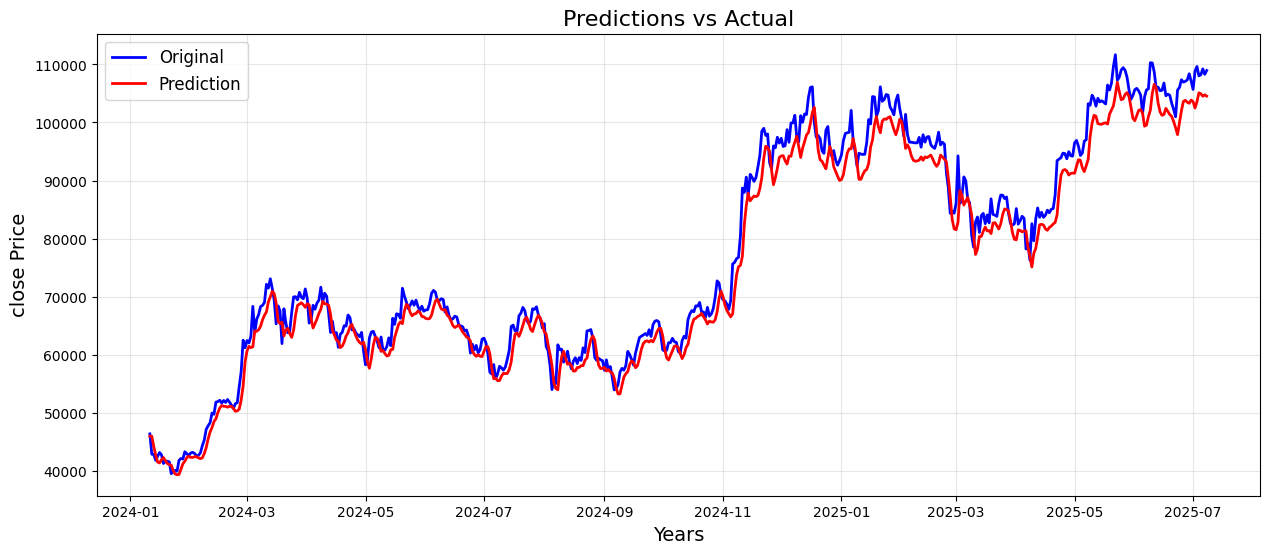

In [36]:
plt.figure(figsize=(15, 6))
plt.plot(plotting_data['Years'], plotting_data['Original'], label='Original', color='blue', linewidth=2)
plt.plot(plotting_data['Years'], plotting_data['Prediction'], label='Prediction', color='red', linewidth=2)

plt.title("Predictions vs Actual", fontsize=16)
plt.xlabel("Years", fontsize=14)
plt.ylabel("close Price", fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()

In [37]:
model.save('model_prediction_BTC_LSTM.keras')

### Building GRU Model

In [38]:
def create_dataset(dataset, look_back=1):
  X_data, y_data = [], []
  for i in range(len(dataset) - look_back):
    X_data.append(dataset[i: (i + look_back)])
    y_data.append(dataset[(i + look_back)])
  return np.array(X_data), np.array(y_data)

In [39]:
X_data, y_data = create_dataset(scaled, look_back=30)

train_size = int(len(X_data) * 0.9)
X_train, y_train = X_data[:train_size], y_data[:train_size]
X_test, y_test = X_data[train_size:], y_data[train_size:]

In [40]:
early_stop = EarlyStopping(
    monitor='loss',
    patience=20,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='loss',
    factor=0.5,
    patience=10,
)

In [41]:
model = Sequential([
    GRU(units=128, return_sequences=True, input_shape=(X_train.shape[1],1)),
    Dropout(0.2),
    GRU(units=64, return_sequences=False,),
    Dropout(0.2),
    Dense(units=1)
    ])

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 30, 128)        │        50,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,617 (342.25 KB)

 Trainable params: 87,617 (342.25 KB)

 Non-trainable params: 0 (0.00 B)

### Training & Evaluation GRU

In [43]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop, reduce_lr]
    )

Epoch 1/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - loss: 0.0025 - learning_rate: 0.0010
Epoch 2/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 3.3233e-04 - learning_rate: 0.0010
Epoch 3/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 5.8237e-04 - learning_rate: 0.0010
Epoch 4/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - loss: 2.3740e-04 - learning_rate: 0.0010
Epoch 5/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - loss: 2.0414e-04 - learning_rate: 0.0010
Epoch 6/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - loss: 2.3129e-04 - learning_rate: 0.0010
Epoch 7/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - loss: 2.7092e-04 - learning_rate: 0.0010
Epoch 8/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - loss: 1.9717e-04 - learning_rate: 0.0010
Epoch 9/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - loss: 2.0054e-04 - learning_rate: 0.0010
Epoch 10/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 2.1291e-04 - learning_rate: 0.0010
Epoch 11/50
154/154 ━━━━━━━━━━━━━━━━━━━━

In [44]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_testing = scaler.inverse_transform(y_test.reshape(-1, 1))

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


In [45]:
rmse = np.sqrt(mean_squared_error(y_testing, predictions))
print(f"RMSE: {rmse}")

RMSE: 2391.8462719149143


In [46]:
plotting_data = pd.DataFrame(
    {
    'Original' : y_testing.flatten(),
    'Prediction' : predictions.flatten(),
    }, index = df['close'].index[train_size + 30:]
    )
plotting_data['Years'] = df.loc[plotting_data.index, 'timeClose'].values
plotting_data['Years'] = pd.to_datetime(plotting_data['Years'])

plotting_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 4929 to 5473
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Original    545 non-null    float64       
 1   Prediction  545 non-null    float32       
 2   Years       545 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float32(1), float64(1)
memory usage: 10.8 KB


In [47]:
plotting_data.tail()

,Original,Prediction,Years
5469,108034.339050,106947.039062,2025-07-04
5470,108231.181990,105771.367188,2025-07-05
5471,109232.069735,106005.562500,2025-07-06
5472,108299.851088,106803.234375,2025-07-07
5473,108950.275543,106076.023438,2025-07-08


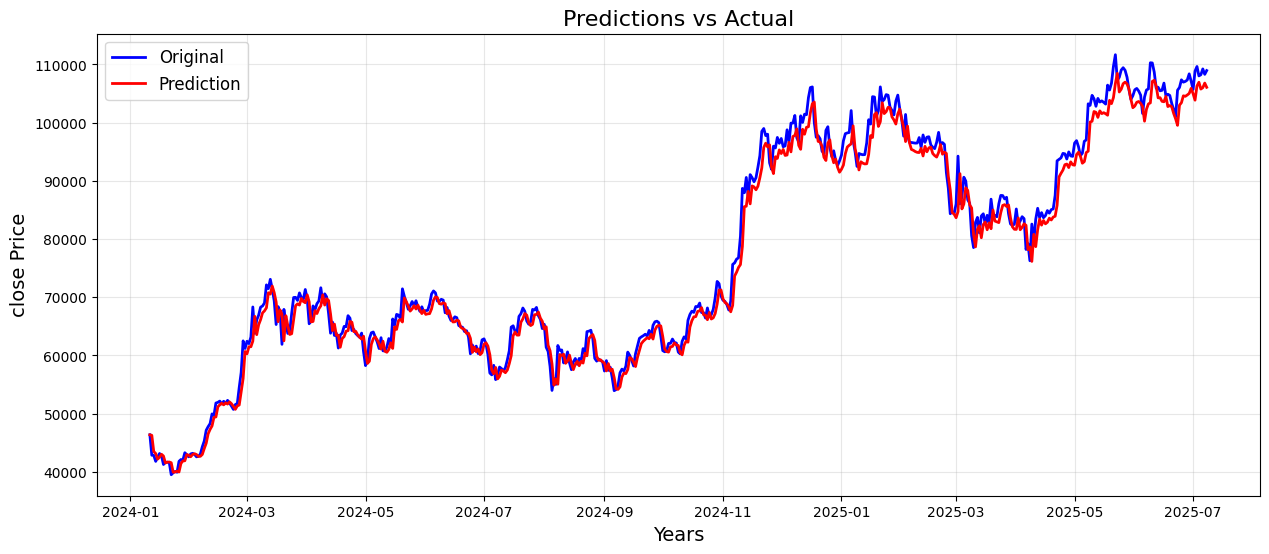

In [48]:
plt.figure(figsize=(15, 6))
plt.plot(plotting_data['Years'], plotting_data['Original'], label='Original', color='blue', linewidth=2)
plt.plot(plotting_data['Years'], plotting_data['Prediction'], label='Prediction', color='red', linewidth=2)

plt.title("Predictions vs Actual", fontsize=16)
plt.xlabel("Years", fontsize=14)
plt.ylabel("close Price", fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()

In [49]:
model.save('model_prediction_BTC_GRU.keras')